Movies Project
A streaming company wants to know how to find the best movies to make available on their platform. Find which variables correlate to a 'successful' movie.
data was obtained through a public dataset on Kaggle and originally scraped from IMDb.(https://www.kaggle.com/danielgrijalvas/movies)

In [149]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #adjusts the configurations of the plots we will create 

# Read in the Data
df = pd.read_csv('Desktop/movies.csv')


In [150]:
# Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [151]:
### Data Cleaning
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [152]:
# Missing Data
df = df.dropna()

In [153]:
# Check Data Types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [154]:
# Changing some datatypes
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# Check if this runs
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [155]:
# found that year does not match with year in release date so we create a yearcorrect column
# creating new column by taking the year from released
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [156]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [157]:
# Duplicate Data
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


In [158]:
df = df.drop("year", axis=1)

In [159]:
# no duplicates found in the dataset and data is prepared for analysis

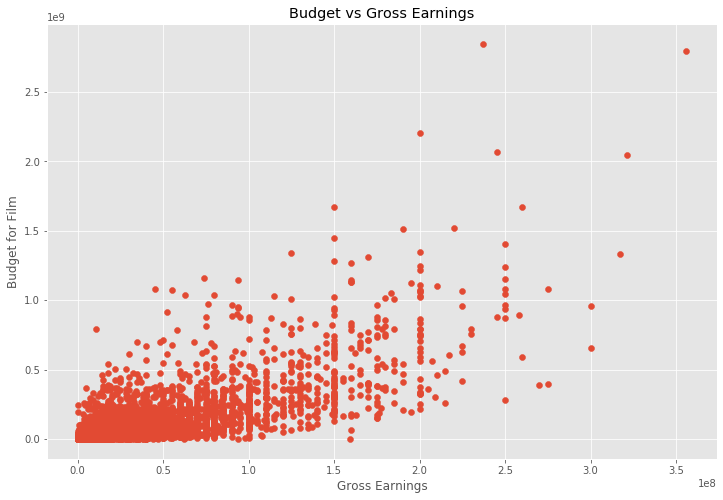

In [160]:
#let's measure success by gross earnings

#budget vs. gross scatterplot
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [161]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


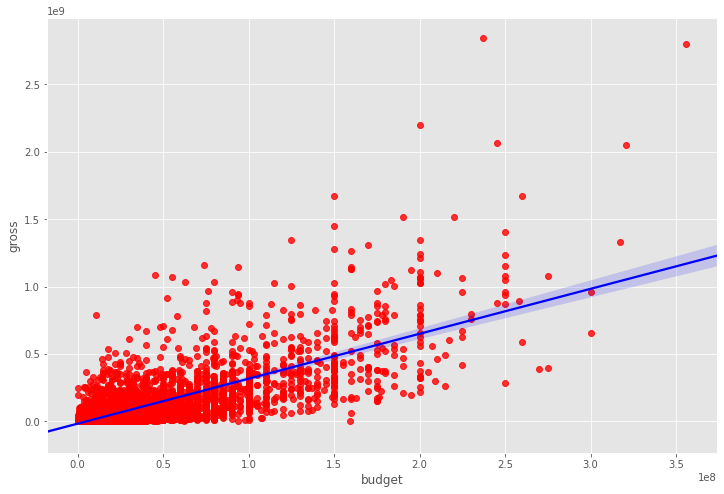

In [162]:
#plot budget vs gross usings seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<function matplotlib.pyplot.show>

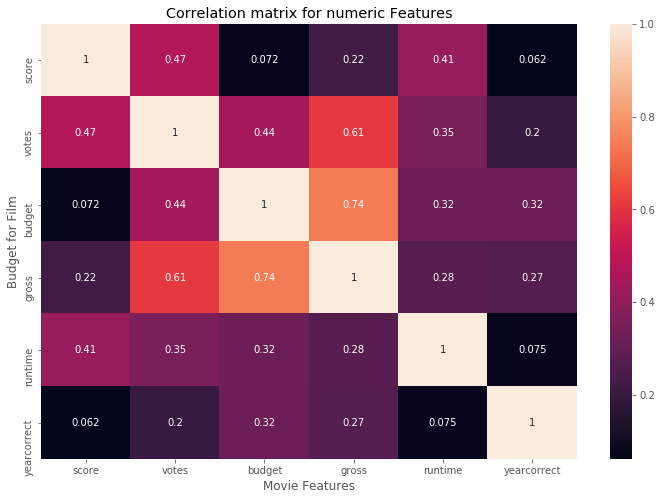

In [163]:
# let's look at correlation
correlation_matrix= df.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Budget for Film')
plt.show

In [164]:
# lets look at correlation for columns not in number format
df_numeration = df

for col_name in df_numeration.columns:
    if(df_numeration[col_name].dtype == 'object'):
        df_numeration[col_name]= df_numeration[col_name].astype('category')
        df_numeration[col_name]= df_numeration[col_name].cat.codes
        
df_numeration

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
7480,4388,4,2,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,2019
6653,2117,5,0,1303,7.0,593000.0,335,2523,293,47,150000000,1670516444,1397,124.0,2015
6043,3878,5,0,1899,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,2012
6646,1541,5,0,165,7.1,370000.0,809,481,1785,47,190000000,1515341399,1397,137.0,2015
7494,1530,4,2,2053,6.8,148000.0,277,1383,1036,47,150000000,1450026933,1422,103.0,2019


In [165]:
# let's look at correlation with these new numbers
correlation_mat = df_numeration.corr()
corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
company      genre         -0.071334
genre        company       -0.071334
yearcorrect  genre         -0.069147
genre        yearcorrect   -0.069147
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     yearcorrect   -0.037371
yearcorrect  director      -0.037371
writer       gross         -0.035885
g

In [166]:
#looking for high correlations
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

<function matplotlib.pyplot.show>

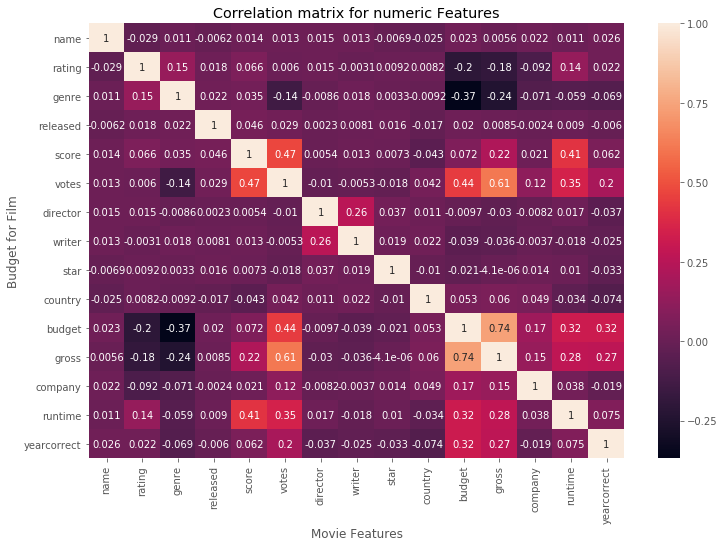

In [167]:
correlation_matrix= df_numeration.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Budget for Film')
plt.show

We can clearly see that votes and budget are the only two variables highly correlated to gross earnings. We can also see that no other pairs of variables have a correlation higher than 0.5. I recommend that the streaming service looks at budget to determine the possible success of a movie.